In [1]:
# Get the closing price for every data, calculate the residual return using the formula
# Simulate a signed simularity matrix
# Do the embedding work and put it in the formula using SPONGE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
# Initialize workflow parameters
num_top = 50
data_path = Path(f'../data/top_{num_top}_companies_by_sector.csv').resolve()
analysis_start = "2024-01-01"
analysis_end = "2024-12-31"

In [4]:
data = pd.read_csv(data_path)
data

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap (B),Country,IPO Year,Volume,Sector,Industry
0,UFPI,UFP Industries Inc. Common Stock,$115.67,-0.7900,-0.678%,7.024022,United States,1993.0,223820,Basic Materials,Forest Products
1,AMWD,American Woodmark Corporation Common Stock,$77.01,0.4800,0.627%,1.159322,United States,1986.0,168642,Basic Materials,Forest Products
2,IPX,IperionX Limited American Depositary Share,$26.52,0.1200,0.455%,0.682213,United States,NaN,50560,Basic Materials,Other Metals and Minerals
3,EU,enCore Energy Corp. Common Shares,$2.91,0.0600,2.105%,0.541518,United States,NaN,1091464,Basic Materials,Other Metals and Minerals
4,USGO,U.S. GoldMining Inc. Common stock,$12.59,1.7800,16.466%,0.156678,United States,2023.0,225247,Basic Materials,Precious Metals
...,...,...,...,...,...,...,...,...,...,...,...
524,VIVK,Vivakor Inc. Common Stock,$0.845,-0.0248,-2.851%,0.028424,United States,NaN,42549,Utilities,Environmental Services
525,SONM,Sonim Technologies Inc. Common Stock,$2.55,-0.0800,-3.042%,0.012423,United States,2019.0,15396,Utilities,Telecommunications Equipment
526,CLRO,ClearOne Inc. (DE) Common Stock,$0.4926,-0.0072,-1.441%,0.011807,United States,NaN,87213,Utilities,Telecommunications Equipment
527,SUNE,SUNation Energy Inc. Common Stock,$1.225,-0.0950,-7.197%,0.002223,United States,NaN,87057,Utilities,Telecommunications Equipment


In [5]:
ticker = data['Symbol'].to_list()
market_ticker = '^GSPC'
ticker.append(market_ticker)
ticker



['UFPI',
 'AMWD',
 'IPX',
 'EU',
 'USGO',
 'USAU',
 'NB',
 'ABAT',
 'HYMC',
 'USGOW',
 'NIOBW',
 'HYMCL',
 'HYMCW',
 'AMZN',
 'TSLA',
 'COST',
 'NFLX',
 'BKNG',
 'SBUX',
 'CTAS',
 'DASH',
 'MAR',
 'ORLY',
 'PYPL',
 'CPRT',
 'PCAR',
 'PAYX',
 'ROST',
 'GSAT',
 'FAST',
 'UAL',
 'EBAY',
 'CSGP',
 'TSCO',
 'CDW',
 'EXPE',
 'DKNG',
 'Z',
 'ZG',
 'NWS',
 'WMG',
 'ULTA',
 'NWSA',
 'DPZ',
 'CASY',
 'DLTR',
 'AKAM',
 'QRTEP',
 'POOL',
 'CART',
 'RIVN',
 'CHRW',
 'TXRH',
 'AAL',
 'LKQ',
 'HQY',
 'CHDN',
 'SIRI',
 'WING',
 'TTEK',
 'WYNN',
 'HAS',
 'ASTS',
 'PEP',
 'MDLZ',
 'MNST',
 'KDP',
 'KHC',
 'SFM',
 'PPC',
 'COKE',
 'CPB',
 'SFD',
 'WBA',
 'FRPT',
 'CALM',
 'LANC',
 'CELH',
 'FIZZ',
 'JJSF',
 'COCO',
 'GO',
 'SONO',
 'VITL',
 'DNUT',
 'IMKTA',
 'JBSS',
 'AVO',
 'ARKO',
 'MGPI',
 'WEST',
 'SENEB',
 'SENEA',
 'VLGEA',
 'LMNR',
 'HAIN',
 'WEYS',
 'LWAY',
 'MAMA',
 'BYND',
 'GNSS',
 'UEIC',
 'PETS',
 'BRID',
 'KOSS',
 'BRFH',
 'ARKOW',
 'FARM',
 'RIME',
 'AGFY',
 'WVVI',
 'JVA',
 'SOWG',
 'FAN

In [6]:
# calculate the rate of return
# align data in the dataframe as well as putting it in a matrix
# run CAPM regression
# compute residual returns
# use SPONGE clustering
# convert this into plotly
stock_price = yf.download(tickers=ticker, start = analysis_start, end = analysis_end)['Close']
stock_price

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  530 of 530 completed

23 Failed downloads:
['NXPLW', 'ARKOW', 'ADNWW', 'DFLIW', 'ANNAW', 'DHCNL', 'NESRW', 'NIOBW', 'MVSTW', 'HYMCW', 'ZEOWW', 'AMODW', 'RMCOW', 'NEHCW', 'FOXXW', 'USGOW', 'NEOVW', 'SLDPW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-01 -> 2024-12-31)')
['QRTEP', 'INFN']: HTTPError('HTTP Error 404: ')
['SFD', 'STRK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-01 -> 2024-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1704085200, endDate = 1735621200")')
['ROIC']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,AAL,AAON,AAPL,ABAT,ABNB,ACDC,ACTG,ADBE,ADI,ADN,...,Z,ZBRA,ZD,ZEO,ZEOWW,ZG,ZION,ZM,ZS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,13.440000,73.545914,184.290421,4.405,134.479996,7.98,3.92,580.070007,189.526337,6.60,...,57.250000,267.980011,67.309998,11.26,NaN,56.220001,41.883698,69.150002,212.369995,4742.830078
2024-01-03,12.950000,72.759689,182.910507,4.230,133.419998,7.95,3.89,571.789978,185.003098,6.15,...,55.230000,252.520004,65.860001,11.28,NaN,53.980000,39.853092,67.169998,210.240005,4704.810059
2024-01-04,13.090000,73.386681,180.587555,4.250,133.720001,7.64,3.82,567.049988,182.173630,6.00,...,54.160000,252.970001,65.570000,11.27,NaN,52.750000,40.460373,66.900002,210.330002,4688.680176
2024-01-05,13.600000,72.102852,179.862823,4.150,135.979996,8.00,3.84,564.599976,182.643570,5.91,...,53.709999,252.690002,65.160004,11.27,NaN,52.430000,41.798294,66.959999,209.809998,4697.240234
2024-01-08,14.580000,73.346870,184.210983,4.120,140.080002,7.95,3.89,580.549988,185.022675,5.94,...,55.669998,261.089996,66.650002,11.28,NaN,54.580002,42.263252,68.389999,218.100006,4763.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,17.250000,123.061127,254.655716,1.780,134.520004,7.18,4.45,446.739990,213.959091,4.39,...,76.690002,390.649994,55.549999,2.05,NaN,73.379997,53.490196,85.269997,185.940002,5974.069824
2024-12-24,17.350000,123.290848,257.578674,2.600,134.990005,7.35,4.51,447.940002,217.145233,5.02,...,77.209999,395.440002,56.360001,2.14,NaN,73.800003,54.070541,85.669998,187.259995,6040.040039
2024-12-26,17.350000,122.531769,258.396667,3.140,135.320007,7.44,4.44,450.160004,217.115356,5.05,...,76.989998,396.850006,56.480000,2.60,NaN,73.660004,54.444321,85.440002,187.630005,6037.589844


In [7]:
stock_price = stock_price.dropna(axis=1)
stock_price

Ticker,AAL,AAON,AAPL,ABAT,ABNB,ACDC,ACTG,ADBE,ADI,ADN,...,YORW,Z,ZBRA,ZD,ZEO,ZG,ZION,ZM,ZS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,13.440000,73.545914,184.290421,4.405,134.479996,7.98,3.92,580.070007,189.526337,6.60,...,37.200626,57.250000,267.980011,67.309998,11.26,56.220001,41.883698,69.150002,212.369995,4742.830078
2024-01-03,12.950000,72.759689,182.910507,4.230,133.419998,7.95,3.89,571.789978,185.003098,6.15,...,36.628452,55.230000,252.520004,65.860001,11.28,53.980000,39.853092,67.169998,210.240005,4704.810059
2024-01-04,13.090000,73.386681,180.587555,4.250,133.720001,7.64,3.82,567.049988,182.173630,6.00,...,36.250240,54.160000,252.970001,65.570000,11.27,52.750000,40.460373,66.900002,210.330002,4688.680176
2024-01-05,13.600000,72.102852,179.862823,4.150,135.979996,8.00,3.84,564.599976,182.643570,5.91,...,35.901123,53.709999,252.690002,65.160004,11.27,52.430000,41.798294,66.959999,209.809998,4697.240234
2024-01-08,14.580000,73.346870,184.210983,4.120,140.080002,7.95,3.89,580.549988,185.022675,5.94,...,36.153263,55.669998,261.089996,66.650002,11.28,54.580002,42.263252,68.389999,218.100006,4763.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,17.250000,123.061127,254.655716,1.780,134.520004,7.18,4.45,446.739990,213.959091,4.39,...,32.668262,76.690002,390.649994,55.549999,2.05,73.379997,53.490196,85.269997,185.940002,5974.069824
2024-12-24,17.350000,123.290848,257.578674,2.600,134.990005,7.35,4.51,447.940002,217.145233,5.02,...,32.559731,77.209999,395.440002,56.360001,2.14,73.800003,54.070541,85.669998,187.259995,6040.040039
2024-12-26,17.350000,122.531769,258.396667,3.140,135.320007,7.44,4.44,450.160004,217.115356,5.05,...,32.885330,76.989998,396.850006,56.480000,2.60,73.660004,54.444321,85.440002,187.630005,6037.589844


In [8]:
returns = stock_price.pct_change().dropna()
ticker = [col for col in stock_price.columns if col != market_ticker]
stock_returns = returns[ticker]
market_returns = returns[market_ticker]
stock_returns

PCA_df = data[['Symbol', 'Sector']]
PCA_df[PCA_df['Symbol'].apply(lambda x: x in ticker)]
PCA_df[PCA_df['Symbol'] == 'ABNB']

,Symbol,Sector
160,ABNB,Finance


In [9]:
residuals = pd.DataFrame(index=stock_returns.index)
for tick in ticker:
    Y = stock_returns[tick]
    X = sm.add_constant(market_returns)
    model = sm.OLS(Y, X).fit()
    residuals[tick] = model.resid

resid_corr = residuals.corr()
resid_corr

/var/folders/g5/7q0ynznx5hs03d9_7j1h1qbc0000gn/T/ipykernel_4282/3373143136.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residuals[tick] = model.resid
/var/folders/g5/7q0ynznx5hs03d9_7j1h1qbc0000gn/T/ipykernel_4282/3373143136.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residuals[tick] = model.resid
/var/folders/g5/7q0ynznx5hs03d9_7j1h1qbc0000gn/T/ipykernel_4282/3373143136.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

,AAL,AAON,AAPL,ABAT,ABNB,ACDC,ACTG,ADBE,ADI,ADN,...,XPON,YORW,Z,ZBRA,ZD,ZEO,ZG,ZION,ZM,ZS
AAL,1.000000,0.008218,-0.040227,0.080345,0.107116,0.041009,0.147996,0.004550,0.054490,-0.036818,...,-0.018808,0.096531,0.003977,0.162913,0.109707,-0.088779,0.008027,0.215022,0.056764,-0.023573
AAON,0.008218,1.000000,-0.211300,-0.036403,-0.130973,0.046388,0.098689,-0.091258,-0.058163,-0.040599,...,-0.017580,0.064156,0.004408,0.175756,0.192160,-0.023249,0.003195,0.138933,0.077197,0.072692
AAPL,-0.040227,-0.211300,1.000000,0.032671,-0.036943,-0.052206,0.006946,-0.045360,-0.007313,0.025294,...,-0.040010,-0.010602,0.029177,-0.112041,-0.041576,0.183881,0.023616,-0.141289,-0.021825,0.029866
ABAT,0.080345,-0.036403,0.032671,1.000000,-0.009265,0.070661,-0.035219,-0.023195,0.063784,0.084002,...,-0.098413,-0.048803,-0.010763,0.066339,0.063867,-0.011289,-0.006432,-0.000195,0.067173,-0.064684
ABNB,0.107116,-0.130973,-0.036943,-0.009265,1.000000,-0.061361,-0.006446,0.019969,0.068949,0.085854,...,0.273743,-0.081445,0.096203,0.190444,-0.096002,0.048272,0.108852,0.036190,0.111242,-0.022429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEO,-0.088779,-0.023249,0.183881,-0.011289,0.048272,-0.007125,-0.025684,0.071118,0.097794,0.088807,...,0.066382,-0.031448,0.051795,0.016147,-0.032012,1.000000,0.039967,0.064286,0.027858,-0.014552
ZG,0.008027,0.003195,0.023616,-0.006432,0.108852,-0.041656,-0.097565,0.029914,-0.023126,0.207925,...,-0.010701,0.002318,0.995487,0.038855,0.118910,0.039967,1.000000,-0.048907,0.092714,0.034340
ZION,0.215022,0.138933,-0.141289,-0.000195,0.036190,0.259138,0.242575,-0.096019,0.033845,0.006709,...,-0.081114,0.337676,-0.038888,0.245504,0.263426,0.064286,-0.048907,1.000000,0.159444,0.102118
ZM,0.056764,0.077197,-0.021825,0.067173,0.111242,0.093687,0.076153,0.102224,0.029176,0.099881,...,-0.011829,0.074634,0.089043,0.092726,0.271347,0.027858,0.092714,0.159444,1.000000,0.224461


In [10]:
threshold = 0.03
n_component = 2


resid_corr_thresh = resid_corr.copy()
resid_corr_thresh[np.abs(resid_corr_thresh) < threshold] = 0

pca = PCA(n_components= n_component)

embedding = pca.fit_transform(resid_corr)

embedding_thresh = pca.fit_transform(resid_corr_thresh)



In [11]:
n_clusters = 11


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embedding)

kmeans_thresh = KMeans(n_clusters=n_clusters, random_state=42)
labels_thresh = kmeans_thresh.fit_predict(embedding_thresh)

In [12]:
pca_df = pd.DataFrame(
    embedding,
    index = resid_corr.index,             # your tickers
    columns = ['PC1','PC2']
)
print(pca_df)
pca_df_merged = pd.merge(pca_df, PCA_df, right_on = 'Symbol', left_index=True).set_index('Symbol')
pca_df_merged

           PC1       PC2
AAL   0.333686 -0.135116
AAON -0.131069 -0.706494
AAPL -2.048046  1.033026
ABAT -1.325479  0.076906
ABNB -1.185291 -0.380022
...        ...       ...
ZEO  -1.072002 -0.006411
ZG   -0.571358  1.060491
ZION  2.897718 -1.475746
ZM    0.637101  0.234795
ZS   -1.171258  0.087624

[500 rows x 2 columns]


,PC1,PC2,Sector
Symbol,,,
AAL,0.333686,-0.135116,Consumer Discretionary
AAON,-0.131069,-0.706494,Industrials
AAPL,-2.048046,1.033026,Technology
ABAT,-1.325479,0.076906,Basic Materials
ABNB,-1.185291,-0.380022,Finance
...,...,...,...
ZEO,-1.072002,-0.006411,Miscellaneous
ZG,-0.571358,1.060491,Consumer Discretionary
ZION,2.897718,-1.475746,Finance


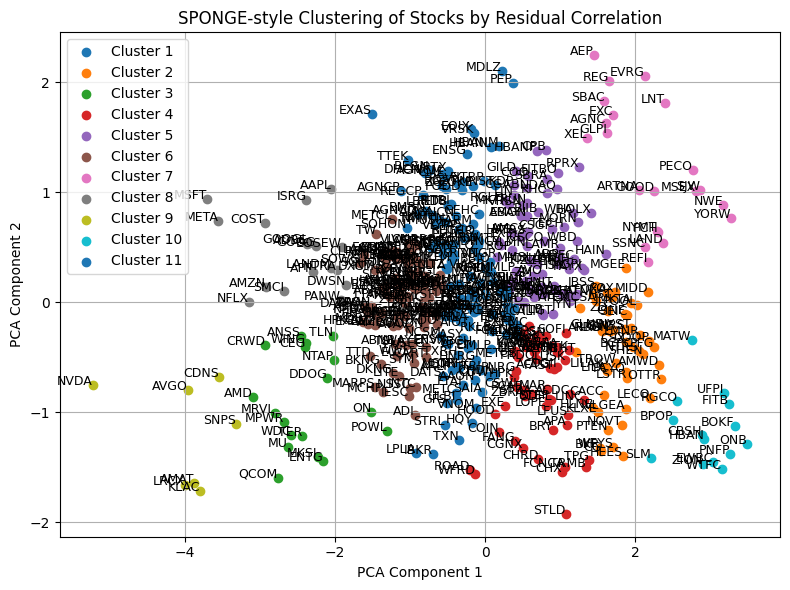

In [13]:
plt.figure(figsize=(8, 6))
plt.show
for i in range(n_clusters):
    plt.scatter(embedding[labels == i, 0], embedding[labels == i, 1], label=f'Cluster {i+1}')
for i, ticker in enumerate(ticker):
    plt.text(embedding[i, 0], embedding[i, 1], ticker, fontsize=9, ha='right')
plt.title("SPONGE-style Clustering of Stocks by Residual Correlation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

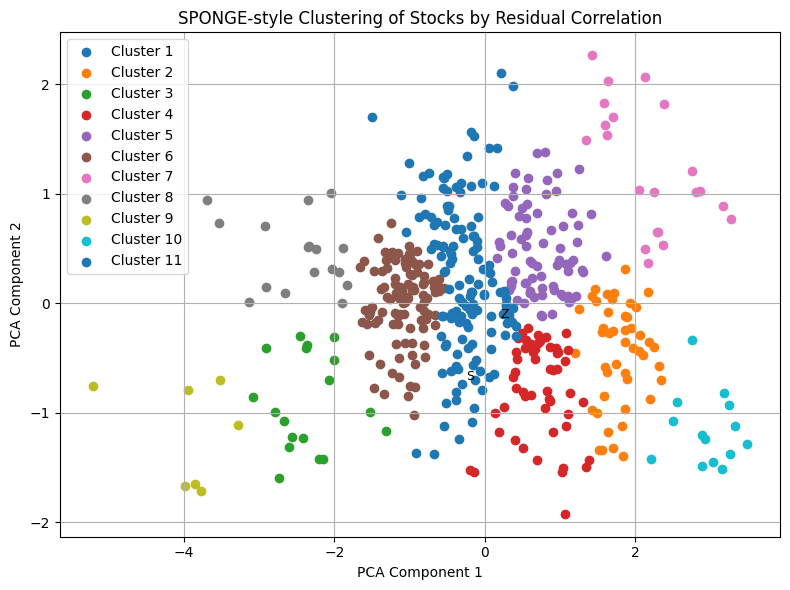

In [14]:
plt.figure(figsize=(8, 6))
plt.show
for i in range(n_clusters):
    plt.scatter(embedding_thresh[labels == i, 0], embedding_thresh[labels == i, 1], label=f'Cluster {i+1}')
for i, ticker in enumerate(ticker):
    plt.text(embedding_thresh[i, 0], embedding_thresh[i, 1], ticker, fontsize=9, ha='right')
plt.title("SPONGE-style Clustering of Stocks by Residual Correlation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
pca_df_merged.reset_index()
pca_df_merged = pca_df_merged.assign(Clusters = labels.astype(str))
pca_df_merged = pca_df_merged.reset_index()

In [16]:
# 2) Plot with Plotly
fig = px.scatter(
    pca_df_merged,
    x='PC1',
    y='PC2',
    color='Clusters',
    hover_name='Symbol',
    hover_data=['Sector'],
    title='Interactive SPONGE-style Clustering of Stocks',
    labels={'PC1': 'PCA Component 1', 'PC2': 'PCA Component 2', 'Name': 'Symbol', 'Sector': 'Sector'}
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Cluster')
fig.show()

In [17]:
# Making more components ~3 to check for clusters and visualize on plotly
pca3 = PCA(n_components=3)
coords3 = pca3.fit_transform(resid_corr)
coords3
df3 = pd.DataFrame(
    coords3,
    index = resid_corr.index,             # your tickers
    columns = ['PC1','PC2','PC3']
).reset_index().rename(columns={'index':'Symbol'})
df3['Cluster'] = labels.astype(str)
df3

,Symbol,PC1,PC2,PC3,Cluster
0,AAL,0.333686,-0.135116,-0.149934,10
1,AAON,-0.131069,-0.706494,-0.739863,10
2,AAPL,-2.048046,1.033026,0.083485,7
3,ABAT,-1.325479,0.076906,0.070119,5
4,ABNB,-1.185291,-0.380022,0.309862,5
...,...,...,...,...,...
495,ZEO,-1.072002,-0.006411,0.045507,5
496,ZG,-0.571358,1.060491,0.972231,0
497,ZION,2.897718,-1.475746,-0.483628,9
498,ZM,0.637101,0.234795,-0.119871,4


In [18]:
PCA_df

,Symbol,Sector
0,UFPI,Basic Materials
1,AMWD,Basic Materials
2,IPX,Basic Materials
3,EU,Basic Materials
4,USGO,Basic Materials
...,...,...
524,VIVK,Utilities
525,SONM,Utilities
526,CLRO,Utilities
527,SUNE,Utilities


In [19]:
pca_df3_merged = pd.merge(df3, PCA_df, right_on = 'Symbol', left_on = 'Symbol')
pca_df3_merged

,Symbol,PC1,PC2,PC3,Cluster,Sector
0,AAL,0.333686,-0.135116,-0.149934,10,Consumer Discretionary
1,AAON,-0.131069,-0.706494,-0.739863,10,Industrials
2,AAPL,-2.048046,1.033026,0.083485,7,Technology
3,ABAT,-1.325479,0.076906,0.070119,5,Basic Materials
4,ABNB,-1.185291,-0.380022,0.309862,5,Finance
...,...,...,...,...,...,...
495,ZEO,-1.072002,-0.006411,0.045507,5,Miscellaneous
496,ZG,-0.571358,1.060491,0.972231,0,Consumer Discretionary
497,ZION,2.897718,-1.475746,-0.483628,9,Finance
498,ZM,0.637101,0.234795,-0.119871,4,Technology


In [20]:
# plot this on 3D plotly and do the same thing
fig = px.scatter_3d(
    pca_df3_merged,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',
    hover_name='Symbol',
    hover_data=['Sector'],
    title='3D PCA of Stock Residuals'
)
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [21]:
Sorted_pca = pca_df_merged.groupby(['Clusters', 'Sector']).count()
Sorted_pca

# TSNE plotting 

Symbol  PC1  PC2
Clusters Sector                                  
0        Basic Materials              2    2    2
         Consumer Discretionary       9    9    9
         Consumer Staples             6    6    6
         Energy                       1    1    1
         Finance                      8    8    8
...                                 ...  ...  ...
8        Technology                   7    7    7
9        Basic Materials              1    1    1
         Finance                     11   11   11
         Telecommunications           1    1    1
         Utilities                    1    1    1

[83 rows x 3 columns]

In [24]:
sorted_pca_3 = pca_df3_merged.groupby(['Cluster', 'Sector']).count()
sorted_pca_3

Symbol  PC1  PC2  PC3
Cluster Sector                                       
0       Basic Materials              2    2    2    2
        Consumer Discretionary       9    9    9    9
        Consumer Staples             6    6    6    6
        Energy                       1    1    1    1
        Finance                      8    8    8    8
...                                ...  ...  ...  ...
8       Technology                   7    7    7    7
9       Basic Materials              1    1    1    1
        Finance                     11   11   11   11
        Telecommunications           1    1    1    1
        Utilities                    1    1    1    1

[83 rows x 4 columns]